# Introduction
- このノートブックでは、MFCCについて学びます。
- ref: http://aidiary.hatenablog.com/entry/20120225/1330179868

# Let's import everything we nead :)

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display

# Data Preparation

In [2]:
filename = librosa.util.example_audio_file()
_data, sr = librosa.load(filename)
data = _data[0:100000]

# Expolatory Data Analysis

**basics**

In [3]:
print('n_samples:   ', len(data))
print('sample rate: ', sr)
print('length:       {:.1f} sec'.format(len(data)/sr))

n_samples:    100000
sample rate:  22050
length:       4.5 sec


---
**plot**

Text(0.5, 0, 'time(sec)')

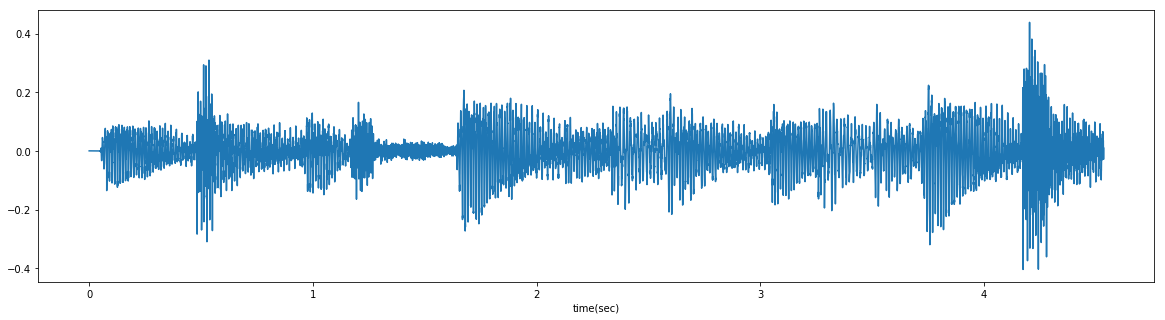

In [4]:
plt.figure(figsize=(20, 5))
_x = np.arange(0, len(data))/sr  # 横軸の単位を index から sec に
plt.plot(_x, data)
plt.xlabel('time(sec)')

---
**listen :)**

In [5]:
IPython.display.Audio(data, rate=sr)

# MFCC

- MFCC は音声解析でよく使われる特徴量である。
- 以下の tutorial で詳細について学ぶ

## フーリエ変換をする前に、ハミング窓をかける

**窓の生成と適用**

In [7]:
HammingWindow = np.hamming(len(data))
data_hamm = data * HammingWindow

---
**plot**

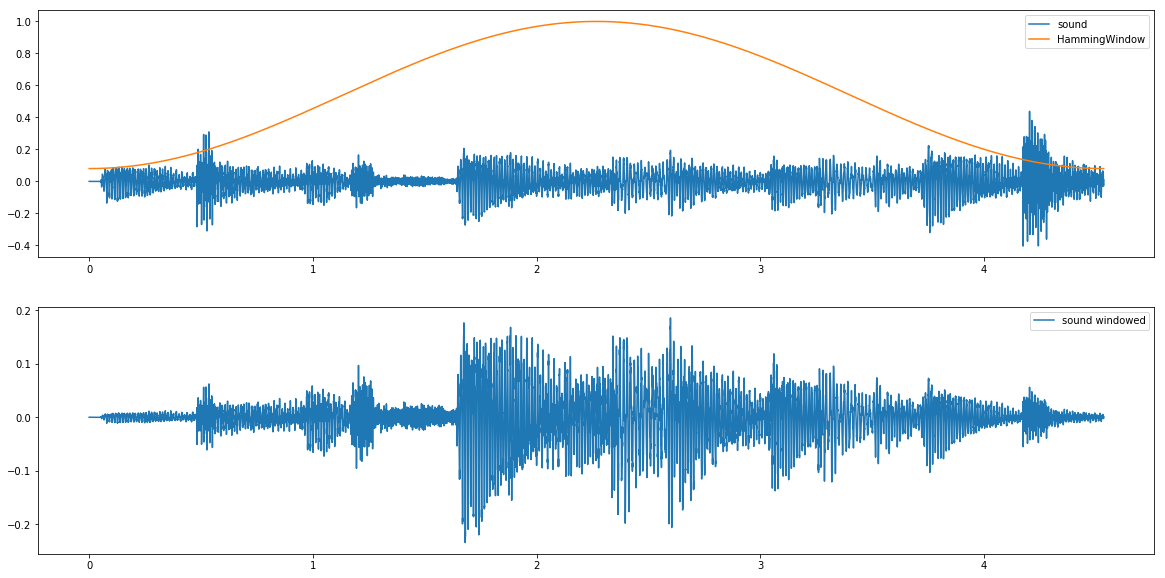

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs.ravel()
axs[0].plot(_x, data, label='sound')
axs[0].plot(_x, HammingWindow, label='HammingWindow')
axs[0].legend()
axs[1].plot(_x, data_hamm, label='sound windowed')
axs[1].legend()

## フーリエ変換

In [26]:
# ----- set params -----
nfft = sr # FFTのサンプル数
# ----------------------

22050


---
**Do it**

In [23]:
spec = np.fft.fft(data_hamm, nfft)[:int(nfft/2)]  # 2で割っているのは、ナイキスト周波数を考慮したため
spec_abs = np.abs(spec)
fscale = np.fft.fftfreq(nfft, d=1.0/sr)[:int(nfft/2)]

---
**plot**

Text(0.5, 0, 'frequency [Hz]')

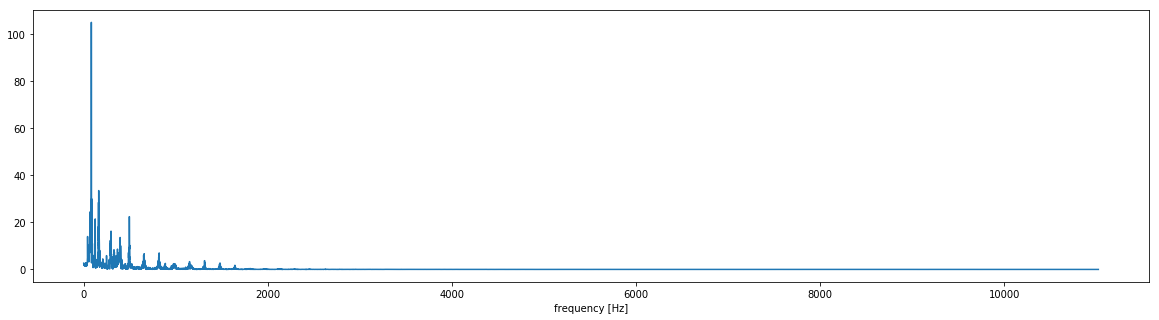

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(fscale, spec_abs)
ax.set_xlabel('frequency [Hz]')

## 人間に聞こえる音について
ある音の周波数f0 を人間が聞いていたとします。この周波数を2倍、3倍と大きくしていくと、人間にはどう聞こえるでしょうか。   
答えは、'2倍、3倍には聞こえない' です。一般に、人間が2倍3倍と感じるには、対数的に周波数が大きくなる必要があるようです。  
では、100Hzの音を聞いてもらった人にその2倍の周波数で聞こえる音というのはどの程度の周波数なのでしょうか。  
その疑問に答える概念が、メル周波数です。


### メル周波数
メル周波数と、周波数の関係は、以下のように書きます。
$$
f_{mel} = \frac{1000}{\log_{10}2} \log_{10} \left( \frac{f}{1000} + 1 \right)
$$
ここで、$f_{mel}$、$f$の単位はそれぞれ、`mel`、`Hz` です。  
$f = 1000$ Hz のとき、$f_{mel} = 1000$ mel になるように調整されています。　 
グラフを書いてみます。

In [27]:
def hz2mel(f):
    """Hzをmelに変換"""
    return 1127.01048 * np.log(f / 700.0 + 1.0)

def mel2hz(m):
    """melをhzに変換"""
    return 700.0 * (np.exp(m / 1127.01048) - 1.0)